In [ ]:
# import package
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#import data from drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DSBA 6211/HEMQ.csv')

In [ ]:
# data exploration
# 1. top 5 rows -- categorical and numeric variables
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# 2. summary statistics
df.describe(include='all')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [ ]:
# 3. check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
# check percentage of missing values
df.isnull().sum()/len(df)

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

In [ ]:
# missing values imputation
NA_names =['MORTDUE','VALUE','YOJ','DEROG',
           'DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

# print(NA_names)
df[NA_names]=df[NA_names].fillna(df[NA_names].mean())

# missing for categorical variable
df['REASON']=df['REASON'].fillna('DebtCon')
df['JOB']=df['JOB'].fillna('Other')
df.describe(include='all')



,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960,5960,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4180,2667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,42481.395689,56843.931566,NaN,NaN,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,NaN,NaN,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,69529.000000,90000.000000,NaN,NaN,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915
75%,0.000000,23300.000000,88200.250000,119004.750000,NaN,NaN,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892


In [ ]:
# double check the missing value number again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
# 4. Generate dummy variables
dummy_data =pd.get_dummies(df[['REASON','JOB']], drop_first = True).astype(int) # transfer into 1/0
dummy_data.describe()

,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.298658,0.159060,0.447483,0.214094,0.018289,0.032383
std,0.457708,0.365763,0.497276,0.410227,0.134004,0.177029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 5. Construct X
num_names=['LOAN','MORTDUE','VALUE','YOJ','DEROG',
           'DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

X = pd.concat([df[num_names],dummy_data],axis=1) # axis = 1 means columns


In [ ]:
X.describe(include='all')


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915,0.298658,0.159060,0.447483,0.214094,0.018289,0.032383
std,11207.480417,42481.395689,56843.931566,7.239301,0.794198,1.071002,83.563059,1.653046,9.948280,7.632713,0.457708,0.365763,0.497276,0.410227,0.134004,0.177029
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,21.000000,33.779915,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.449442,227.143058,2.000000,26.000000,37.949892,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#6. Data transformation find the skewness in data
X.skew(skipna=True) # threshold between -2, 2

LOAN              2.023781
MORTDUE           1.898829
VALUE             3.082429
YOJ               1.034125
DEROG             5.667985
DELINQ            4.234346
CLAGE             1.379512
NINQ              2.741856
CLNO              0.789895
DEBTINC           3.214191
REASON_HomeImp    0.880081
JOB_Office        1.864890
JOB_Other         0.211289
JOB_ProfExe       1.394361
JOB_Sales         7.191910
JOB_Self          5.284728
dtype: float64

array([[<Axes: title={'center': 'LOAN'}>,
        <Axes: title={'center': 'MORTDUE'}>,
        <Axes: title={'center': 'VALUE'}>,
        <Axes: title={'center': 'YOJ'}>],
       [<Axes: title={'center': 'DEROG'}>,
        <Axes: title={'center': 'DELINQ'}>,
        <Axes: title={'center': 'CLAGE'}>,
        <Axes: title={'center': 'NINQ'}>],
       [<Axes: title={'center': 'CLNO'}>,
        <Axes: title={'center': 'DEBTINC'}>,
        <Axes: title={'center': 'REASON_HomeImp'}>,
        <Axes: title={'center': 'JOB_Office'}>],
       [<Axes: title={'center': 'JOB_Other'}>,
        <Axes: title={'center': 'JOB_ProfExe'}>,
        <Axes: title={'center': 'JOB_Sales'}>,
        <Axes: title={'center': 'JOB_Self'}>]], dtype=object)

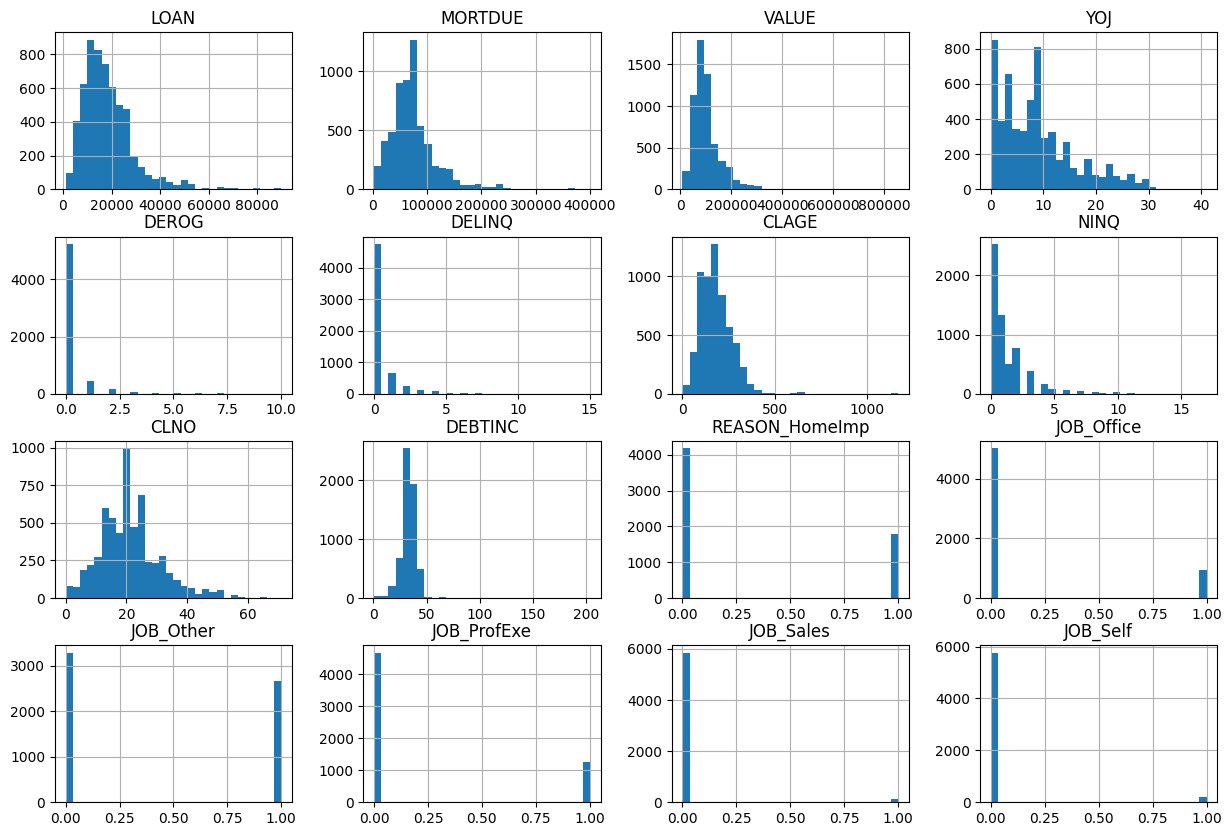

In [ ]:
X.hist(bins=30,figsize=(15,10)) # width and height

In [ ]:
# 6.1 Variable Transformation - part 1
import numpy as np

X['VALUE']=np.log(X['VALUE'])
X['DEBTINC']=np.log(X['DEBTINC'])

# can we do the same for degro delinq?

In [ ]:
# 6.2 Variable Transformation - part 2

def combine(x):
  if x>0:
    return 1
  else:
    return 0

X['NINQ']=X['NINQ'].apply(combine)
X['DEROG'] = X['DEROG'].apply(combine)
X['DELINQ'] = X['DELINQ'].apply(combine)



In [ ]:
# 7. Variable Selection -- Highly correlated variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data =pd.DataFrame() # create a empty data frame
vif_data['feature'] = X[num_names].columns # create column feature with variable names


vif_data['VIF'] = [variance_inflation_factor(X[num_names].values, i)
                   for i in range(len(X[num_names].columns))]

vif_data


,feature,VIF
0,LOAN,4.080811
1,MORTDUE,5.337547
2,VALUE,170.222474
3,YOJ,2.696981
4,DEROG,1.827560
5,DELINQ,1.917109
6,CLAGE,6.361860
7,NINQ,2.613463
8,CLNO,6.780386
9,DEBTINC,146.295861


In [ ]:
# Check correlation
X.corr()

# try a nicer interpretation below:
corr = X.corr()
corr.style.background_gradient(cmap="coolwarm").format("{:.2f}") # keep two decimal


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
LOAN,1.00,0.22,0.31,0.10,-0.05,-0.05,0.09,-0.01,0.07,0.05,-0.15,-0.02,-0.06,0.02,-0.04,0.16
MORTDUE,0.22,1.00,0.72,-0.08,-0.01,-0.02,0.13,0.05,0.31,0.11,-0.02,-0.07,-0.26,0.26,0.02,0.10
VALUE,0.31,0.72,1.00,0.01,-0.06,-0.08,0.19,-0.02,0.32,0.11,-0.04,-0.03,-0.30,0.27,0.02,0.13
YOJ,0.10,-0.08,0.01,1.00,-0.06,-0.02,0.19,-0.06,0.02,-0.02,0.05,-0.03,0.05,-0.01,-0.04,-0.04
DEROG,-0.05,-0.01,-0.06,-0.06,1.00,0.49,-0.04,0.26,0.08,0.01,-0.05,-0.05,0.08,-0.10,0.02,-0.02
DELINQ,-0.05,-0.02,-0.08,-0.02,0.49,1.00,-0.01,0.18,0.13,0.00,-0.00,-0.01,0.06,-0.07,-0.03,-0.01
CLAGE,0.09,0.13,0.19,0.19,-0.04,-0.01,1.00,-0.07,0.23,-0.03,0.05,-0.00,-0.08,0.11,0.03,-0.01
NINQ,-0.01,0.05,-0.02,-0.06,0.26,0.18,-0.07,1.00,0.13,0.11,-0.11,-0.04,0.06,-0.05,-0.06,0.04
CLNO,0.07,0.31,0.32,0.02,0.08,0.13,0.23,0.13,1.00,0.17,-0.11,-0.00,-0.20,0.17,0.05,0.03
DEBTINC,0.05,0.11,0.11,-0.02,0.01,0.00,-0.03,0.11,0.17,1.00,-0.02,0.03,-0.03,-0.05,0.03,0.01


In [ ]:
# remove variables cause large correlation
X = X.drop(columns=['VALUE'])

In [ ]:
# 8. Generat outcome and Data partitation

y=df['BAD']
print(y)

from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=0)

# can check shape later: for example X_train.shape

X_train.dtypes

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64


LOAN                int64
MORTDUE           float64
YOJ               float64
DEROG               int64
DELINQ              int64
CLAGE             float64
NINQ                int64
CLNO              float64
DEBTINC           float64
REASON_HomeImp      int64
JOB_Office          int64
JOB_Other           int64
JOB_ProfExe         int64
JOB_Sales           int64
JOB_Self            int64
dtype: object

In [ ]:
# 9. Fit a logistic regression

import statsmodels.api as sm

log_reg = sm.Logit(y_train,X_train).fit() # what is our target and predtors here?
print(log_reg.summary())




Optimization terminated successfully.
         Current function value: 0.455512
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 4172
Model:                          Logit   Df Residuals:                     4157
Method:                           MLE   Df Model:                           14
Date:                Mon, 05 Feb 2024   Pseudo R-squ.:                 0.09603
Time:                        19:36:27   Log-Likelihood:                -1900.4
converged:                       True   LL-Null:                       -2102.3
Covariance Type:            nonrobust   LLR p-value:                 2.020e-77
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
LOAN           -1.107e-05   4.13e-06     -2.679      0.007   -1.92e-05   -2.97e-06
MORTDUE        -2

In [ ]:
import math
1-math.exp(-0.0137)
# with 1 unit increase in YOJ, the odds of default reduce 2%

math.exp(0.2182) - 1

0.2438358099059854

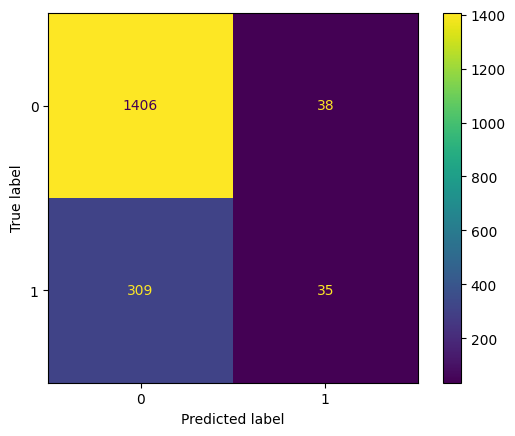

0.8059284116331096


In [ ]:
# 10. Model Evaluation (accuracy + confusion matrix)
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

prediction_prob =log_reg.predict(X_val)

# print(prediction_prob)

prediction =list(map(round,prediction_prob))  # map(fun, iter-iterable) =>
cm = confusion_matrix(y_val,prediction) # row - true value; column - predicted
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
# disp.plot()
plt.show() # display all open figures

print(accuracy_score(y_val,prediction))

#sensitivity = 290/(290+54)
#specificity = 1392/(1392+52)

#print('sensitivity =', 290/(290+54))
#print('specificity =', 1392/(1392+52))

# other metrics: https://scikit-learn.org/stable/modules/model_evaluation.html


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val,prediction)) # recall is sensitivity

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1444
           1       0.48      0.10      0.17       344

    accuracy                           0.81      1788
   macro avg       0.65      0.54      0.53      1788
weighted avg       0.75      0.81      0.75      1788



Logistic: ROC AUC = 0.726 


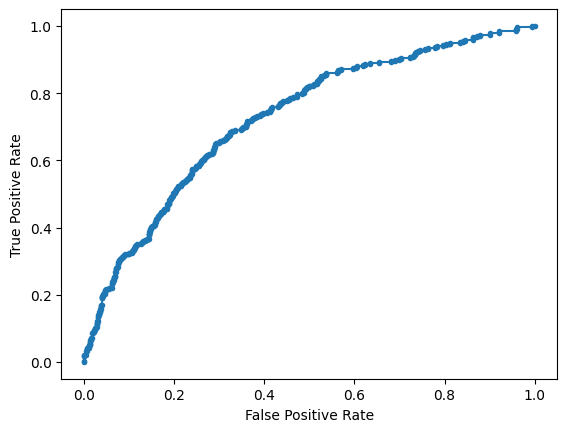

In [ ]:
# model evaluation -- roc curve
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plt # Matplotlib is a plotting library for the Python

lr_auc = roc_auc_score(y_val,prediction_prob)
print('Logistic: ROC AUC = %.3f ' % (lr_auc))  # % as a placeholder; f then refers to "Floating point decimal format", 3 number if decimal after the point


lr_fpr, lr_tpr, threshold = roc_curve(y_val,prediction_prob)
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [ ]:
! pip install kds # exclamation mark

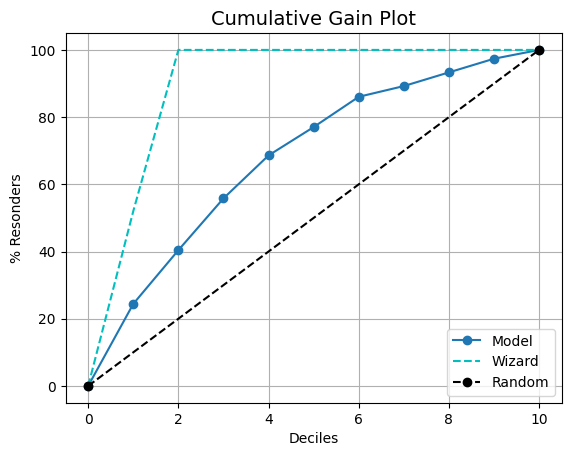

In [ ]:
# 10. model evaluation -- The Cumulative Gain Chart
!pip install kds
import kds
kds.metrics.plot_cumulative_gain(y_val, prediction_prob) # Wizard curve will provide the best possible curve for the model.


In [ ]:
print (math.log(9))

2.1972245773362196
